<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [6]:
dat="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [8]:
iris = pd.read_csv(data_URL, header=None)

In [10]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.columns =["sepal_length", "sepal_width","petal_length", "petal_width","species"]

In [15]:
iris.dropna(how="all", inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Task 3: Visualize the Data
---

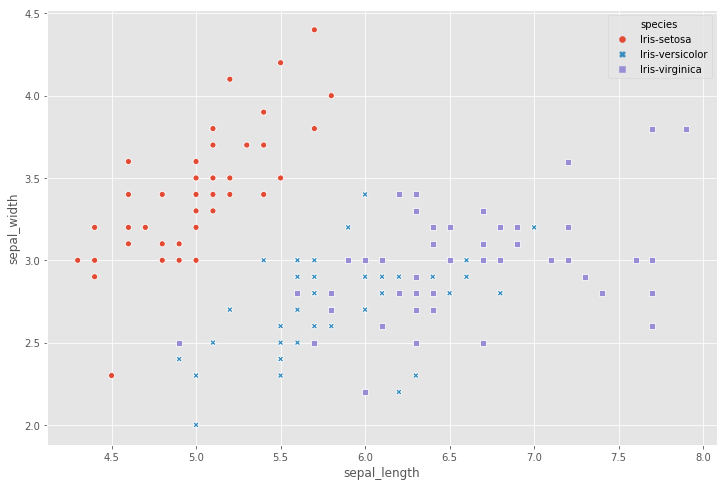

In [18]:
sns.scatterplot(x=iris.sepal_length, y= iris.sepal_width,
                hue= iris.species, style=iris.species)

### Task 4: Standardize the Data
---

In [27]:
x= iris.iloc[:, 0:4].values
y= iris.species.values

In [29]:
from sklearn.preprocessing import StandardScaler

x= StandardScaler().fit_transform(x)

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [31]:
covariance_matrix = np.cov(x.T)
print("Covariance matrix: \n", covariance_matrix)

Covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [33]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors: \n", eigen_vectors, "\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



### Task 6: Singular Value Decomposition (SVD)
---

In [35]:
eigen_vec_svd, s, v = np.linalg.svd(x.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Task 7: Picking Principal Components Using the Explained Variance
---

In [36]:
for val in eigen_values:
    print(val)

2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


In [38]:
variance_explained = [(i/sum(eigen_values)) for i in eigen_values ]
variance_explained

[0.7277045209380134,
 0.2303052326768065,
 0.03683831957627377,
 0.005151926808906323]

In [40]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

Text(0.5, 1.0, 'Explained variance vs number of components')

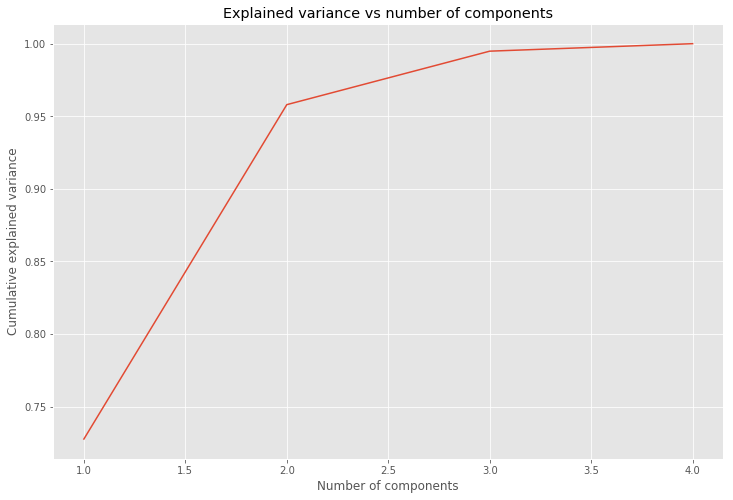

In [41]:
sns.lineplot(x= [1,2,3,4], y= cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs number of components")

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [42]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [44]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
print("Projection matrix: \n", projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [46]:
x_pca = x.dot(projection_matrix)

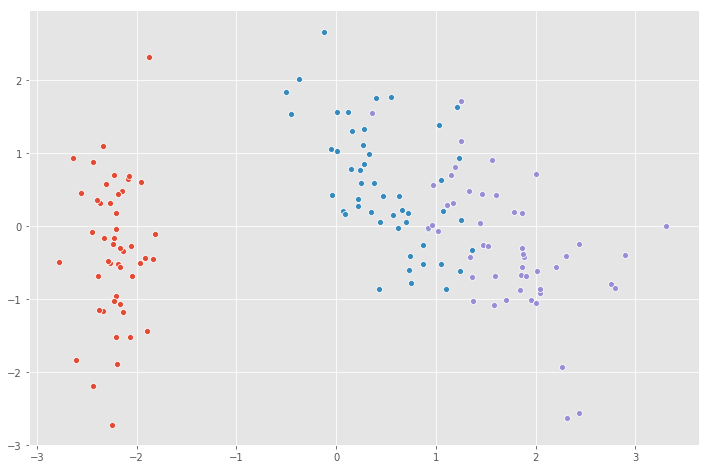

In [52]:
for species in ("Iris-setosa", "Iris-versicolor","Iris-virginica"):
    sns.scatterplot(x_pca[y==species, 0], x_pca[y==species, 1])